The following code is the class structure created to simulate the 2D ising model via the metropolis algorithm
The first step in implementing the code is to import all of the neccesary libraries etc that will be used throughout the simulation.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as random
import scipy
from scipy import constants
import import_ipynb

Below is the class, named IsingModel that will be called upon to run various parts of the simulation. File included in submission. The import_ipynb was needs to be pip installed in the anaconda prompt via ' pip install import_ipynb'
according to the post from the user 'axil' on the following stackexchange thread.
https://stackoverflow.com/questions/20186344/ipynb-import-another-ipynb-file

In [2]:
from IsingClass import IsingModel
    

importing Jupyter notebook from IsingClass.ipynb


Below I plot and solve the ising model for a 100*100 grid in the absence of magnetic field. As can be seen the model tends towards all sights having parallel spins, this is known as the ferromagnetic model.

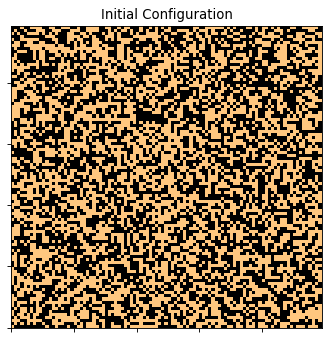

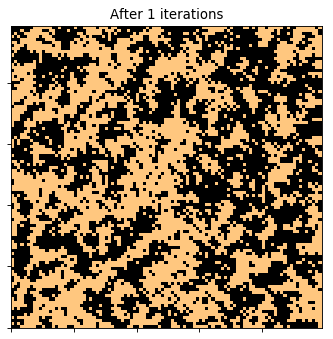

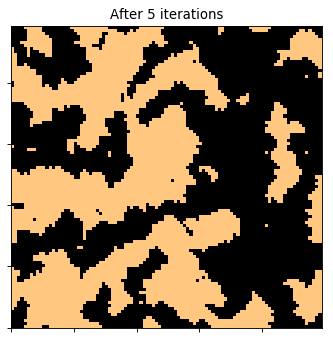

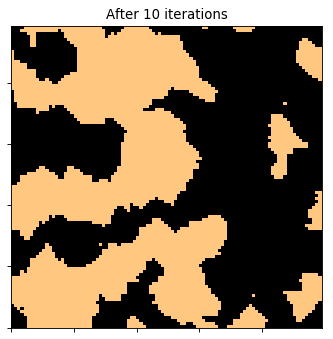

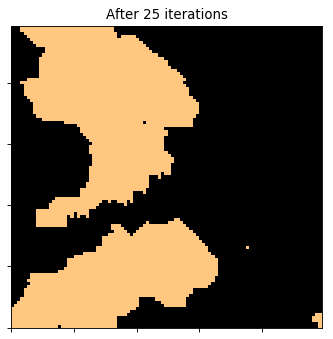

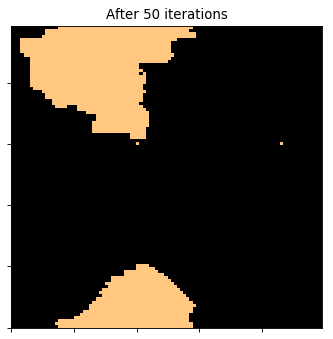

In [5]:
solve = IsingModel(dim=100, pbcs = True, J = [1], Jrule = 'nn', starting_temp=1.0,grid_type = 'square', field = 0)
solve.grid_figure(solve.init_moments,0)

solve.run(num_its = 1, temp = solve.temp)
solve.grid_figure(solve.current_moments,1)
solve.run(num_its = 4, temp = solve.temp)
solve.grid_figure(solve.current_moments,5)
solve.run(num_its = 5, temp = solve.temp)
solve.grid_figure(solve.current_moments,10)
solve.run(num_its = 15, temp = solve.temp)
solve.grid_figure(solve.current_moments,25)
solve.run(num_its = 25, temp = solve.temp)
solve.grid_figure(solve.current_moments,50)

Below I simulate the system at temperature = 1 and produce a plot to gain an idea of how many sweeps of the sweeps of the system it takes for the simulated material to become magnetised. Note how if J is set to J=[-1] the magentisation graph changes such that equilibrium is near the 0 mark, whilst the energy graph remains unchanged in shape as the system remains to evolve such that the energy of the system is minimised.

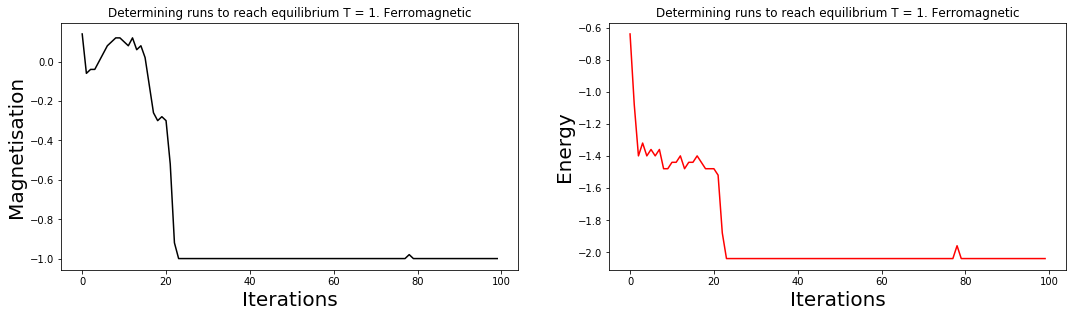

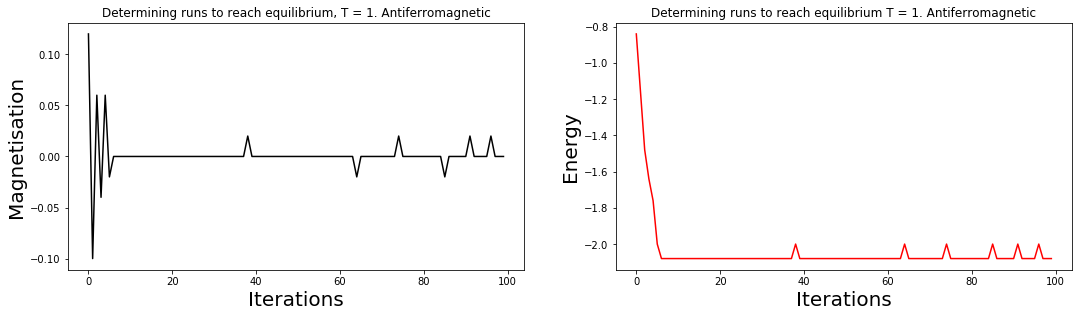

In [21]:
solve = IsingModel(dim=10, pbcs = True, J=[1], starting_temp=1.0,grid_type = 'square', field = 0)
iters = []

for i in range(100):
    solve.single_update()
    iters.append(i)
    
fig = plt.figure(figsize=(18, 10)); # plot the calculated values    

f =  fig.add_subplot(2, 2, 1 );
plt.plot(iters, solve.maglist[1:], color='black')
plt.title("Determining runs to reach equilibrium T = %d. Ferromagnetic" %(solve.temp))
plt.xlabel("Iterations", fontsize=20);
plt.ylabel("Magnetisation", fontsize=20);         plt.axis('tight');

f =  fig.add_subplot(2, 2, 2 );
plt.plot(iters, solve.energy_list[1:], color='red')
plt.title("Determining runs to reach equilibrium T = %d. Ferromagnetic" %(solve.temp))
plt.xlabel("Iterations", fontsize=20);
plt.ylabel("Energy", fontsize=20);         plt.axis('tight');

solve = IsingModel(dim=10, pbcs = True, J=[-1], starting_temp=1.0,grid_type = 'square', field = 0)
iters = []

for i in range(100):
    solve.single_update()
    iters.append(i)
    
fig = plt.figure(figsize=(18, 10)); # plot the calculated values    

f =  fig.add_subplot(2, 2, 1 );
plt.plot(iters, solve.maglist[1:], color='black')
plt.title("Determining runs to reach equilibrium, T = %d. Antiferromagnetic" %(solve.temp))
plt.xlabel("Iterations", fontsize=20);
plt.ylabel("Magnetisation", fontsize=20);         plt.axis('tight');

f =  fig.add_subplot(2, 2, 2 );
plt.plot(iters, solve.energy_list[1:], color='red')
plt.title("Determining runs to reach equilibrium T = %d. Antiferromagnetic" %(solve.temp))
plt.xlabel("Iterations", fontsize=20);
plt.ylabel("Energy", fontsize=20);         plt.axis('tight');



All plots resembling the above included in the PDF report were simply obitained by changing the values of J between +1 and -1 changing PBCS from True to False and changing the value of the starting temp when calling the IsingModel class. Not the system reaches equilibrium states after approximately 20/30 sweeps for the ferromagnetic and earlier for the anti in this case above.

Below when the value of J is swithced to -1 it can be seen the model tends towards spins that have antiparallel spins. This is known as the antiferromagnetic model.

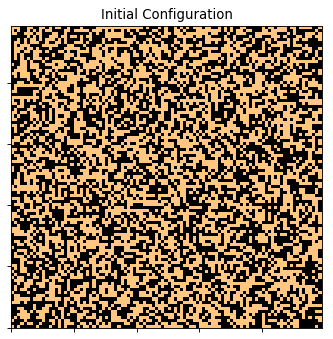

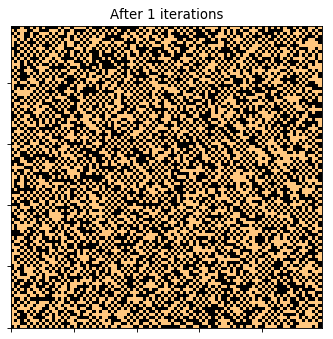

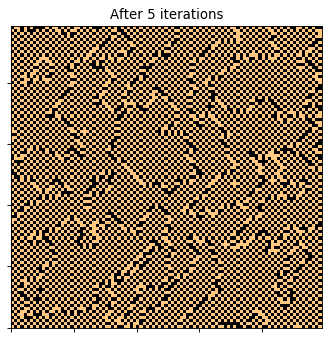

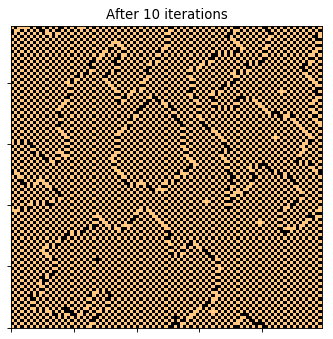

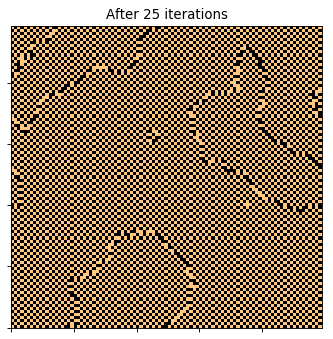

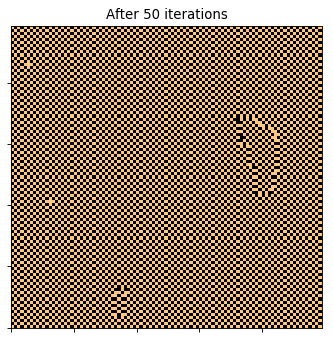

In [5]:
solve = IsingModel(dim=100, pbcs = True, J=[-1], starting_temp=1.0,grid_type = 'square', field = 0)
solve.grid_figure(solve.init_moments,0)

solve.run(num_its = 1, temp = solve.temp)
solve.grid_figure(solve.current_moments,1)
solve.run(num_its = 4, temp = solve.temp)
solve.grid_figure(solve.current_moments,5)
solve.run(num_its = 5, temp = solve.temp)
solve.grid_figure(solve.current_moments,10)
solve.run(num_its = 15, temp = solve.temp)
solve.grid_figure(solve.current_moments,25)
solve.run(num_its = 25, temp = solve.temp)
solve.grid_figure(solve.current_moments,50)

I will now work with a smaller 10x10 lattice to begin recording the average values of Energy, Magnetisation, Heat Capacity and Magnetic Susceptibility after the system has reached equilibrium. 75 warmup runs were used and averages were taken over 150 sweeps of the system. 75 warmup runs may have been unneccesary as is visible in the magnetisation vs iterations graph above equilibrium seems to be reached long before 75 sweeps of the system for a 10x10 lattice. Plots for external field can be reproduced by making 'field' non-zero when caalling IsingModel class below.

In [22]:
avgen=[]
avgmag=[]  #these are lists in which we will store our avergage recorded values
avgmag1=[]
capac=[]
suscept=[]
testruns, runs = 75, 100
y = np.linspace(-1,1,2)
x = np.ones_like(y)
templist=np.linspace(1.2,5,250)
for i, temps in enumerate(templist):
    solve = IsingModel(dim=10, pbcs = True, J=[1], Jrule = 'nn', starting_temp=1.0,grid_type = 'square', field = 0)
    solve.run(num_its = testruns+runs, temp = temps)
    x = np.mean(solve.maglist[testruns:])
    avgmag1.append(x)
    avgmag.append((x*x)**0.5)
    avgen.append(np.mean(solve.energy_list[testruns:]))
    suscept.append(np.var(solve.maglist[testruns:])/(temps))            #susceptibility is variance of magnetisation*beta
    capac.append(np.var(solve.energy_list[testruns:])/(temps**2))       #heat capacity is variance of energy*beta^2

When calculating the magnetic susceptibilty and heat capacity we are using the formulas 

$\chi = \sigma_{M}^{2} \beta^{2}$

$C_{v} = \sigma_{E}^{2} \beta $

Where we are taking $\beta = \frac{1}{T}$ due to the assumption that k=1

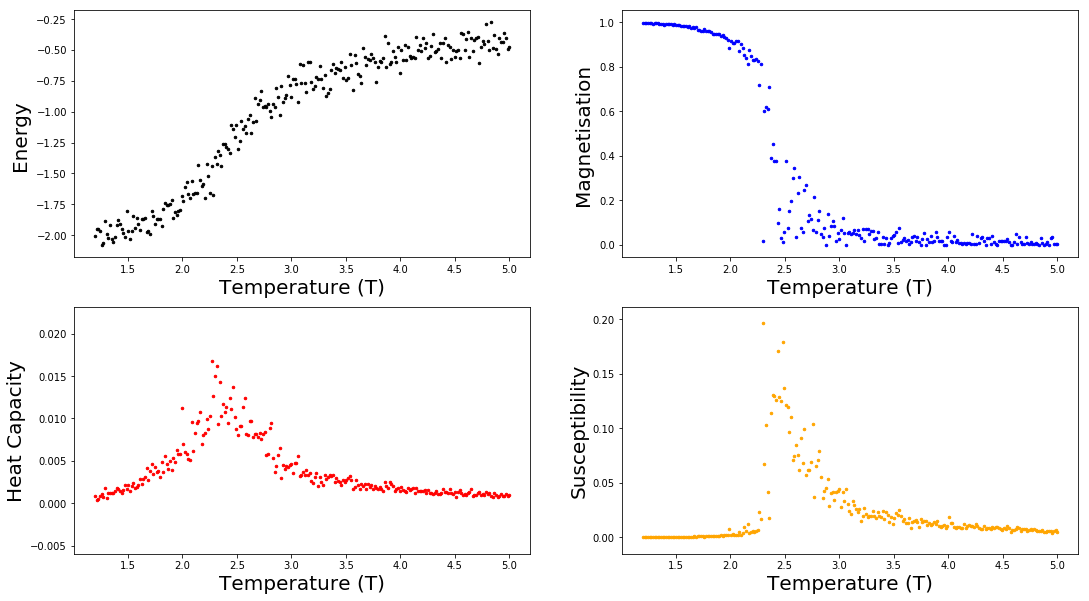

In [23]:
fig = plt.figure(figsize=(18, 10)); # plot the calculated values    

f =  fig.add_subplot(2, 2, 1 );
plt.scatter(templist, avgen, s=25, marker='.', color='black')
plt.xlabel("Temperature (T)", fontsize=20);
plt.ylabel("Energy ", fontsize=20);         plt.axis('tight');

f =  fig.add_subplot(2, 2, 2 );
plt.scatter(templist, avgmag, s=25, marker='.', color='blue')
plt.xlabel("Temperature (T)", fontsize=20); 
plt.ylabel("Magnetisation ", fontsize=20);   plt.axis('tight');

f =  fig.add_subplot(2, 2, 3 );
plt.scatter(templist, capac, s=25, marker='.', color='red')
plt.xlabel("Temperature (T)", fontsize=20);
plt.ylabel("Heat Capacity", fontsize=20);         plt.axis('tight');

f =  fig.add_subplot(2, 2, 4 );
plt.scatter(templist, suscept, s=25, marker='.', color='orange')
plt.xlabel("Temperature (T)", fontsize=20); 
plt.ylabel("Susceptibility", fontsize=20);   plt.axis('tight');

Below I ignored the absolute value operation that was applied when plotting the average magnetisation to investigate if there is a preference for the system to tend towards all sights becoming spin up or spin down. The bifurcation in the diagram below suggests this is not the case and the 2D material can spontaneously magnetise to have all spins aligned in either direction below the curie temperature. The theoretical curie temperature was also included to check the agreement of the simulation with theoretical prediction and the agreement is obvious.

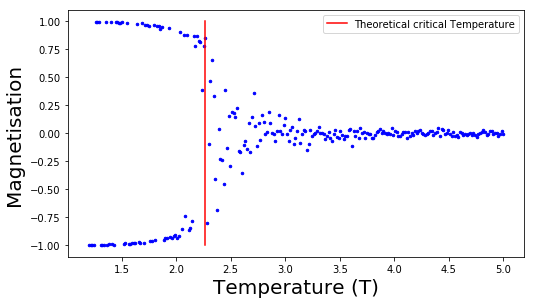

In [20]:
y = np.linspace(-1,1,2)
x = np.ones_like(y)

fig1 = plt.figure(figsize=(18, 10)); # plot the calculated values    

f =  fig1.add_subplot(2, 2, 1 );
plt.scatter(templist, avgmag1, s=25, marker='.', color='blue')
plt.plot(2.269*x,y,label='Theoretical critical Temperature', color = 'red')
plt.legend()
plt.xlabel("Temperature (T)", fontsize=20); 
plt.ylabel("Magnetisation ", fontsize=20);   plt.axis('tight');

I run the simulation again below for an antiferromagnetic material

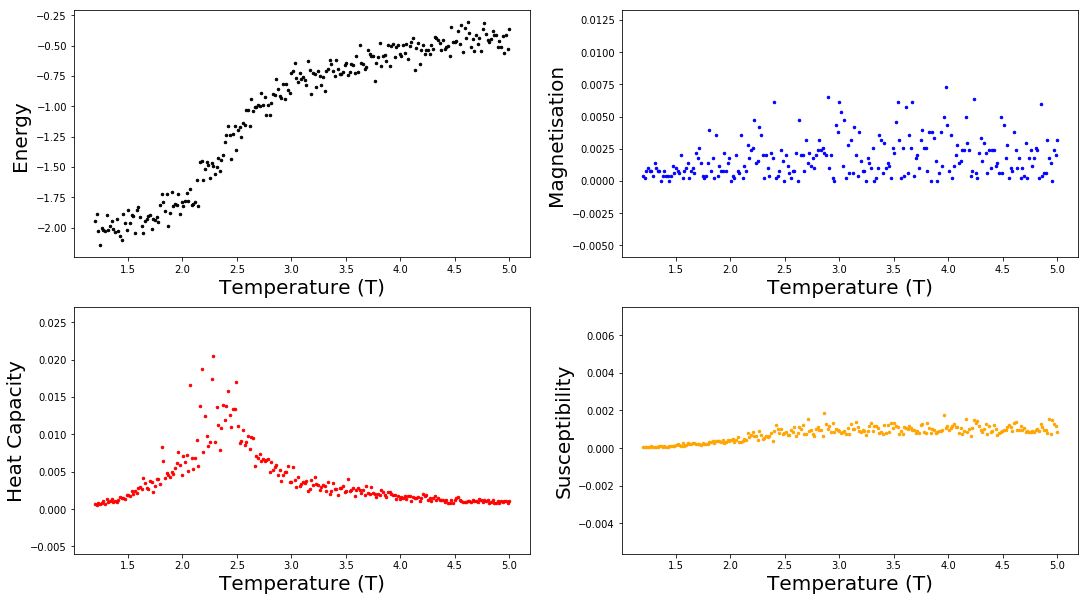

In [9]:
avgen=[]
avgmag=[]
capac=[]
suscept=[]
for i, temps in enumerate(templist):
    solve = IsingModel(dim=10, pbcs = True, J=[-1], starting_temp=1.0,grid_type = 'square')
    solve.run(num_its = testruns+runs, temp = temps)
    x = np.mean(solve.maglist[testruns:])
    avgmag.append((x*x)**0.5)
    avgen.append(np.mean(solve.energy_list[testruns:]))
    suscept.append(np.var(solve.maglist[testruns:])/(temps))            #susceptibility is variance of magnetisation*beta
    capac.append(np.var(solve.energy_list[testruns:])/(temps**2))
    
fig = plt.figure(figsize=(18, 10)); # plot the calculated values    

f =  fig.add_subplot(2, 2, 1 );
plt.scatter(templist, avgen, s=25, marker='.', color='black')
plt.xlabel("Temperature (T)", fontsize=20);
plt.ylabel("Energy ", fontsize=20);         plt.axis('tight');

f =  fig.add_subplot(2, 2, 2 );
plt.scatter(templist, avgmag, s=25, marker='.', color='blue')
plt.xlabel("Temperature (T)", fontsize=20); 
plt.ylabel("Magnetisation ", fontsize=20);   plt.axis('tight');

f =  fig.add_subplot(2, 2, 3 );
plt.scatter(templist, capac, s=25, marker='.', color='red')
plt.xlabel("Temperature (T)", fontsize=20);
plt.ylabel("Heat Capacity", fontsize=20);         plt.axis('tight');

f =  fig.add_subplot(2, 2, 4 );
plt.scatter(templist, suscept, s=25, marker='.', color='orange')
plt.xlabel("Temperature (T)", fontsize=20); 
plt.ylabel("Susceptibility", fontsize=20);   plt.axis('tight');

As can be seen the material still evolves in a way than minimises the energy of the system , however now the magnetisation tends to be towards 0 which indicates that the spins are becoming antiparallel to one another, suggetsing that for an antiferromagnetic system the state of mimimum energy occurs whn all spins are antiparallel

Below I thought it would be interesting to see what changes I would see in the graphs of iterations vs magnetisation/energy when the periodic boundary conditions were turned off. The system remained to evolve in a way that minimused energy however the evolution itself was much more erratic. Moreover there does not seem to be any obvious relation between the energy of the system and its magnetisation, unlike when PBCS was turned on a miimum energy accured at magnetisation $=\pm 1$ (ferromagnetic) or 0 (antiferromagnetic)

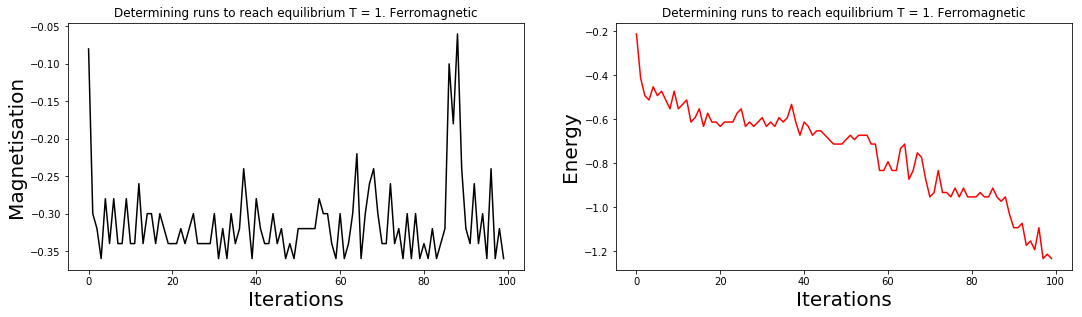

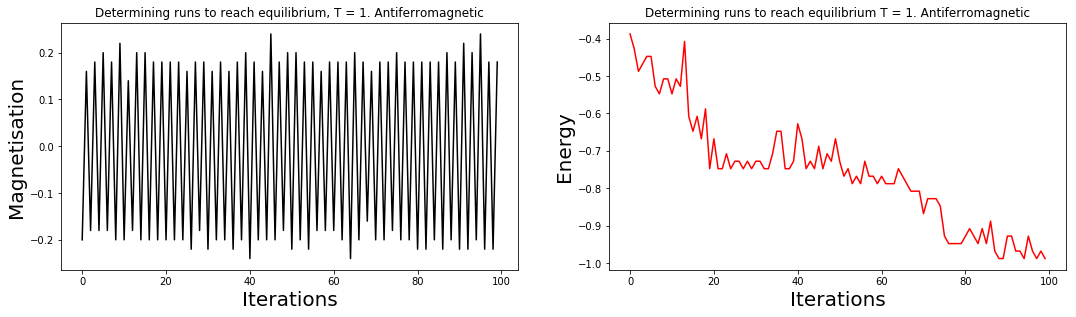

In [10]:
solve = IsingModel(dim=10, pbcs = False, J=[1], starting_temp=1.0,grid_type = 'square', field = 0)
iters = []

for i in range(100):
    solve.single_update()
    iters.append(i)
    
fig = plt.figure(figsize=(18, 10)); # plot the calculated values    

f =  fig.add_subplot(2, 2, 1 );
plt.plot(iters, solve.maglist[1:], color='black')
plt.title("Determining runs to reach equilibrium T = %d. Ferromagnetic" %(solve.temp))
plt.xlabel("Iterations", fontsize=20);
plt.ylabel("Magnetisation", fontsize=20);         plt.axis('tight');

f =  fig.add_subplot(2, 2, 2 );
plt.plot(iters, solve.energy_list[1:], color='red')
plt.title("Determining runs to reach equilibrium T = %d. Ferromagnetic" %(solve.temp))
plt.xlabel("Iterations", fontsize=20);
plt.ylabel("Energy", fontsize=20);         plt.axis('tight');

solve = IsingModel(dim=10, pbcs = False, J=[-1], starting_temp=1.0,grid_type = 'square', field = 0)
iters = []

for i in range(100):
    solve.single_update()
    iters.append(i)
    
fig = plt.figure(figsize=(18, 10)); # plot the calculated values    

f =  fig.add_subplot(2, 2, 1 );
plt.plot(iters, solve.maglist[1:], color='black')
plt.title("Determining runs to reach equilibrium, T = %d. Antiferromagnetic" %(solve.temp))
plt.xlabel("Iterations", fontsize=20);
plt.ylabel("Magnetisation", fontsize=20);         plt.axis('tight');

f =  fig.add_subplot(2, 2, 2 );
plt.plot(iters, solve.energy_list[1:], color='red')
plt.title("Determining runs to reach equilibrium T = %d. Antiferromagnetic" %(solve.temp))
plt.xlabel("Iterations", fontsize=20);
plt.ylabel("Energy", fontsize=20);         plt.axis('tight');

A quick invetigation into the effect of an external magnetic field on the critical tempertaure of the material was investigated next. A field with a strength of 5 was chosen (randomly) and the simulation was run with periodic boundary conditions turned on , nearest neighbour setting enabled in a 2D square grid.

In [11]:
avgen=[]
avgmag=[]  #these are lists in which we will store our avergage recorded values
avgmag1=[]
capac=[]
suscept=[]
testruns, runs = 75, 100
y = np.linspace(-1,1,2)
x = np.ones_like(y)
templist=np.linspace(1.2,5,250)
for i, temps in enumerate(templist):
    solve = IsingModel(dim=10, pbcs = True, J=[1], Jrule = 'nn', starting_temp=1.0,grid_type = 'square', field = 5)
    solve.run(num_its = testruns+runs, temp = temps)
    x = np.mean(solve.maglist[testruns:])
    avgmag1.append(x)
    avgmag.append((x*x)**0.5)
    avgen.append(np.mean(solve.energy_list[testruns:]))
    suscept.append(np.var(solve.maglist[testruns:])/(temps))            #susceptibility is variance of magnetisation*beta
    capac.append(np.var(solve.energy_list[testruns:])/(temps**2))       #heat capacity is variance of energy*beta^2

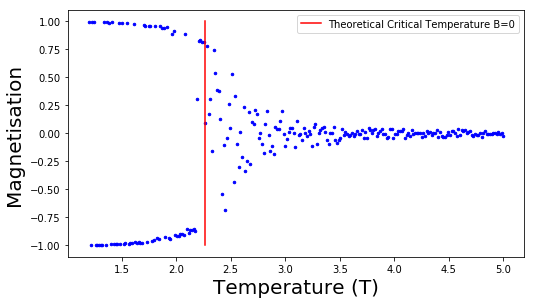

In [12]:
y = np.linspace(-1,1,2)
x = np.ones_like(y)

fig1 = plt.figure(figsize=(18, 10)); # plot the calculated values    

f =  fig1.add_subplot(2, 2, 1 );
plt.scatter(templist, avgmag1, s=25, marker='.', color='blue')
plt.plot(2.269*x,y,label='Theoretical Critical Temperature B=0', color = 'red')
plt.legend()
plt.xlabel("Temperature (T)", fontsize=20); 
plt.ylabel("Magnetisation ", fontsize=20);   plt.axis('tight');

The external field of 5 applied above appears to have had no impact on the critical temperature of the material.

Investigations were then carried out regarding systems in which interactions take place amongst all neighbours, not just the nearest ones. This would result in eight neighbours for each sight.It was found that this new neighbour scheme when carried out using PBCS still did in fact allow for spontaneous magnetisation, however the critical temperature seems to have been increased to $\approx 5.3$ K

In [13]:
avgen=[]
avgmag=[]  #these are lists in which we will store our avergage recorded values
avgmag1=[]
capac=[]
suscept=[]
testruns, runs = 75, 100
y = np.linspace(-1,1,2)
x = np.ones_like(y)
templist=np.linspace(3,8,250)
for i, temps in enumerate(templist):
    solve = IsingModel(dim=10, pbcs = True, J=[1], Jrule = 'sq', starting_temp=1.0,grid_type = 'square', field = 0)
    solve.run(num_its = testruns+runs, temp = temps)
    x = np.mean(solve.maglist[testruns:])
    avgmag1.append(x)
    avgmag.append((x*x)**0.5)
    avgen.append(np.mean(solve.energy_list[testruns:]))
    suscept.append(np.var(solve.maglist[testruns:])/(temps))            #susceptibility is variance of magnetisation*beta
    capac.append(np.var(solve.energy_list[testruns:])/(temps**2))       #heat capacity is variance of energy*beta^2

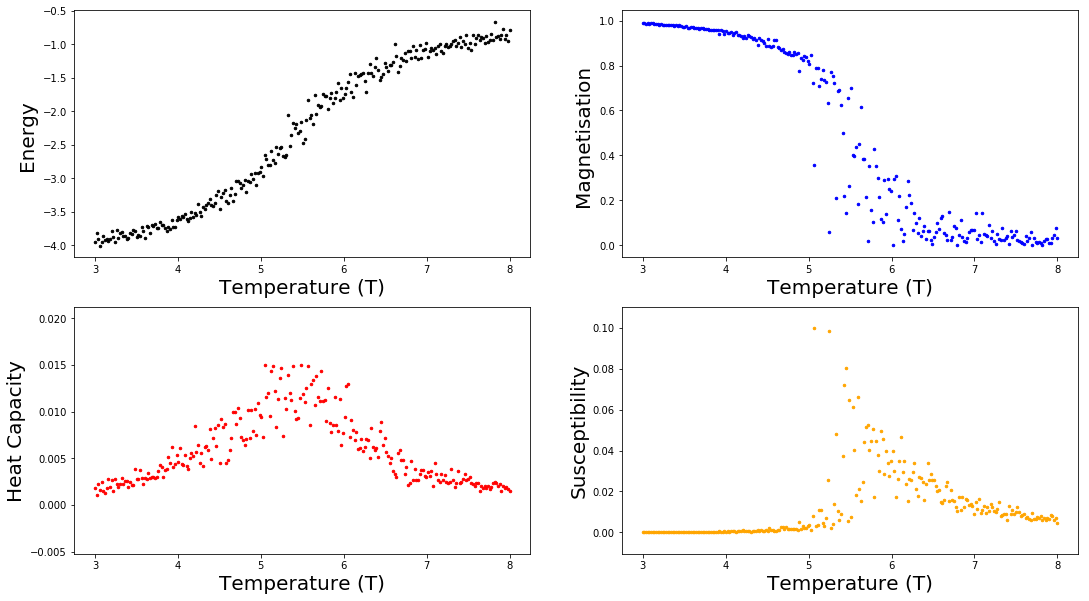

In [14]:
fig = plt.figure(figsize=(18, 10)); # plot the calculated values    

f =  fig.add_subplot(2, 2, 1 );
plt.scatter(templist, avgen, s=25, marker='.', color='black')
plt.xlabel("Temperature (T)", fontsize=20);
plt.ylabel("Energy ", fontsize=20);         plt.axis('tight');

f =  fig.add_subplot(2, 2, 2 );
plt.scatter(templist, avgmag, s=25, marker='.', color='blue')
plt.xlabel("Temperature (T)", fontsize=20); 
plt.ylabel("Magnetisation ", fontsize=20);   plt.axis('tight');

f =  fig.add_subplot(2, 2, 3 );
plt.scatter(templist, capac, s=25, marker='.', color='red')
plt.xlabel("Temperature (T)", fontsize=20);
plt.ylabel("Heat Capacity", fontsize=20);         plt.axis('tight');

f =  fig.add_subplot(2, 2, 4 );
plt.scatter(templist, suscept, s=25, marker='.', color='orange')
plt.xlabel("Temperature (T)", fontsize=20); 
plt.ylabel("Susceptibility", fontsize=20);   plt.axis('tight');

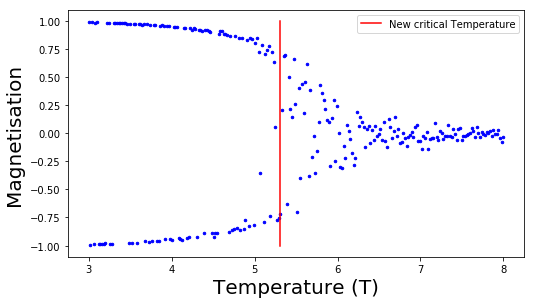

In [15]:
y = np.linspace(-1,1,2)
x = np.ones_like(y)

fig1 = plt.figure(figsize=(18, 10)); # plot the calculated values    

f =  fig1.add_subplot(2, 2, 1 );
plt.scatter(templist, avgmag1, s=25, marker='.', color='blue')
plt.plot(5.3*x,y,label='New critical Temperature', color = 'red')
plt.legend()
plt.xlabel("Temperature (T)", fontsize=20); 
plt.ylabel("Magnetisation ", fontsize=20);   plt.axis('tight');